## Wind Power Generation Prediction
Today we will try to predict the weather multiple hours in advance. We will make a plot of prediction score vs # of hours in advance we are predicting.

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Lets import the data

In [67]:
data_gen = pd.read_csv('https://raw.githubusercontent.com/mkrogius/ai4all_wind_generation_public/master/time_series_60min_singleindex_filtered.csv',
                   usecols=lambda s: s.startswith('utc') or s.startswith('DE'),
                   parse_dates=[0], index_col=0)
data_gen_2016 = data_gen.loc['20160101':'20170101', 'DE_wind_generation_actual']
data_wind = pd.read_csv('https://raw.githubusercontent.com/mkrogius/ai4all_wind_generation_public/master/weather_data_filtered.csv',
                       parse_dates=[0], index_col=0)
data_wind_2016 = data_wind.loc['20160101':'20170101']
data_wind_2016 = data_wind_2016[data_wind_2016.index.duplicated() == False]
data_2016 = pd.concat([data_wind_2016, data_gen_2016], axis=1, join='inner')

Let's calculate the average temperature for each month. First let's add a column to the dataset which is the month from the timestamp.

Now let's use groupby to compute the mean temperature for each month.

Plot the temperature in fahrenheit.

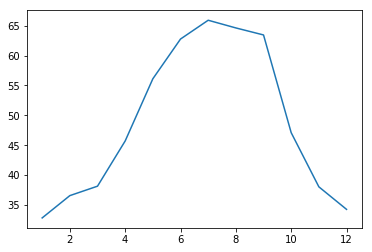

Now plot windspeed vs month.

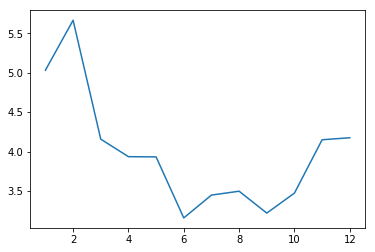

In [74]:
month_data

,DE_windspeed_10m,DE_temperature,DE_radiation_direct_horizontal,DE_radiation_diffuse_horizontal
month,,,,
1,5.031326,0.462884,9.504797,26.638444
2,5.664725,2.536478,23.313165,43.164280
3,4.157791,3.414090,63.895598,66.165122
4,3.935688,7.619121,94.556285,94.539225
5,3.932771,13.402708,139.902269,106.538094
6,3.159438,17.098613,129.340183,121.683055
7,3.448803,18.846489,143.459181,112.626620
8,3.497893,18.131516,147.664944,83.427707
9,3.220638,17.478453,115.698348,61.743720


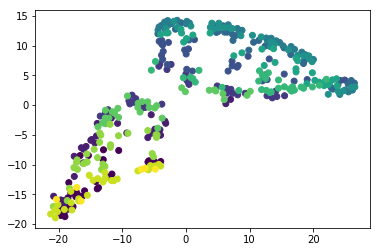

In [75]:
from sklearn.manifold import TSNE
embed = TSNE().fit_transform(day_data)
color = [x // 30 for x in range(366)]
plt.scatter(embed[:,0], embed[:,1], c=color)

In [76]:
embed.shape


(366, 2)

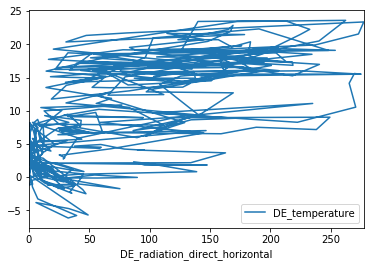

In [77]:
day_data.plot('DE_radiation_direct_horizontal', 'DE_temperature')

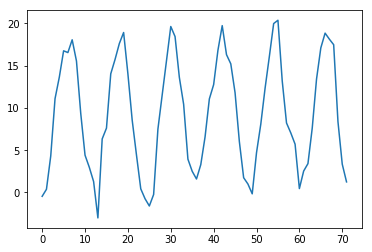

In [87]:
data_wind['year'] = data_wind.index.year
data_wind['month'] = data_wind.index.month
wind_data = data_wind.groupby(['year', 'month']).mean()['DE_temperature']
plt.plot(wind_data.values)

In [88]:
data_gen.dtypes

DE_load_actual_entsoe_power_statistics    float64
DE_load_actual_entsoe_transparency        float64
DE_load_forecast_entsoe_transparency      float64
DE_price_day_ahead                        float64
DE_solar_capacity                           int64
DE_solar_generation_actual                float64
DE_solar_profile                          float64
DE_wind_capacity                            int64
DE_wind_generation_actual                 float64
DE_wind_profile                           float64
DE_wind_offshore_capacity                   int64
DE_wind_offshore_generation_actual        float64
DE_wind_offshore_profile                  float64
DE_wind_onshore_capacity                    int64
DE_wind_onshore_generation_actual         float64
DE_wind_onshore_profile                   float64
dtype: object